## Empresa ABC 

La empresa ABC reporta en el mes los siguientes datos (producción de mesas):

| Concepto                       | Monto ($) | Tipo |
|--------------------------------|-----------|------|
| Abrasivos                      | 5.000     | CIF  |
| Combustibles                   | 12.000    | CIF  |
| MOD (Mano de Obra Directa)     | 750.000   | MOD  |
| MOI (Mano de Obra Indirecta)   | 100.000   | CIF  |
| Depreciación equipos           | 100.000   | CIF  |
| Compra de Materia Prima (MP)   | 854.900   | MPD  |
| Gastos envío sucursal          | 175.000   | GCom |
| Mantenimiento equipos          | 100.000   | CIF  |
| Horas extras indirectas        | 50.000    | CIF  |
| Energía eléctrica              | 25.000    | CIF  |
| Alquiler edificio fábrica      | 126.750   | CIF  |
| Seguro equipos                 | 16.250    | CIF  |
| Comisiones de ventas           | 150.000   | GCom |
| Sueldos personal ventas        | 250.000   | GCom |
| Gastos administrativos         | 250.000   | GAdm |
| **Ventas**                     | **3.000.000** |   |

**Inventarios de materiales directos**  
- Inicial: $100.000  
- Final: $125.000  

**Producción del mes:** 9.750 unidades  
**Unidades vendidas:** 6.420

#### Importaciones y configuración

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches

In [ ]:
# Configuración de estilo
plt.style.use('default')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

#### Definición de datos

In [51]:
# Datos y clasificación
def cargar_datos():
    """Carga y clasifica los datos del ejercicio"""
    datos = {
        "Abrasivos": 5000, "Combustibles": 12000, "MOD": 750000, "MOI": 100000,
        "Depreciación equipos": 100000, "Compra de MP": 854900, 
        "Gastos de envío a sucursal": 175000, "Mantenimiento equipos": 100000,
        "Horas extras indirectas producción": 50000, "Energía eléctrica": 25000,
        "Alquiler edificio fábrica": 126750, "Seguro equipos": 16250,
        "Comisiones de ventas": 150000, "Sueldo personal ventas": 250000,
        "Gastos administrativos": 250000
    }
    
    clasificacion = {
        "MPD": ["Compra de MP"],
        "MOD": ["MOD"],
        "CIF": ["Abrasivos", "Combustibles", "MOI", "Depreciación equipos",
                "Mantenimiento equipos", "Horas extras indirectas producción",
                "Energía eléctrica", "Alquiler edificio fábrica", "Seguro equipos"],
        "Gastos Comerciales": ["Gastos de envío a sucursal", "Comisiones de ventas", "Sueldo personal ventas"],
        "Gastos Administrativos": ["Gastos administrativos"]
    }
    
    inventarios = {"inicial": 100000, "final": 125000}
    unidades = {"producidas": 9750, "vendidas": 6420}
    ventas = 3000000
    
    return datos, clasificacion, inventarios, unidades, ventas

# Cargar datos
datos, clasificacion, inventarios, unidades, ventas = cargar_datos()

In [52]:
# Función para crear DataFrames de clasificación
def crear_df_clasificacion():
    """Crea DataFrame con la clasificación de costos"""
    datos_clasificacion = []
    for categoria, items in clasificacion.items():
        for item in items:
            datos_clasificacion.append({
                'Concepto': item,
                'Categoría': categoria,
                'Monto ($)': datos[item]
            })
    
    df_clasif = pd.DataFrame(datos_clasificacion)
    df_totales = df_clasif.groupby('Categoría')['Monto ($)'].sum().reset_index()
    df_totales['Concepto'] = 'TOTAL ' + df_totales['Categoría']
    
    return pd.concat([df_clasif, df_totales], ignore_index=True)

df_clasificacion = crear_df_clasificacion()
print("CLASIFICACIÓN DE COSTOS Y GASTOS")
display(df_clasificacion)

CLASIFICACIÓN DE COSTOS Y GASTOS


,Concepto,Categoría,Monto ($)
0,Compra de MP,MPD,854900
1,MOD,MOD,750000
2,Abrasivos,CIF,5000
3,Combustibles,CIF,12000
4,MOI,CIF,100000
5,Depreciación equipos,CIF,100000
6,Mantenimiento equipos,CIF,100000
7,Horas extras indirectas producción,CIF,50000
8,Energía eléctrica,CIF,25000
9,Alquiler edificio fábrica,CIF,126750


#### 1. Costo Primo (CP)

El costo primo incluye Materiales Directos (MPD) + Mano de Obra Directa (MOD).
Los materiales directos se ajustan con inventarios:


\begin{align*}
\text{Materia Prima Directa} &= \text{Compras de Materia Prima} + \text{Inventario Inicial} - \text{Inventario Final} \\
\\
\text{Costo Primo} &= \text{Materia Prima Directa} + \text{Mano de Obra Directa} \\
\\
\end{align*}



In [53]:
# Función para calcular Costo Primo
def calcular_costo_primo():
    """Calcula el Costo Primo (MPD + MOD)"""
    compras_mp = sum(datos[item] for item in clasificacion["MPD"])
    mpd = compras_mp + inventarios["inicial"] - inventarios["final"]
    mod = sum(datos[item] for item in clasificacion["MOD"])
    costo_primo = mpd + mod
    
    # Crear DataFrame para mostrar el cálculo
    df_calculo = pd.DataFrame({
        'Concepto': [
            'Compras Materia Prima',
            'Inventario Inicial',
            'Inventario Final',
            'MATERIA PRIMA DIRECTA (MPD)',
            'Mano de Obra Directa (MOD)',
            'COSTO PRIMO (MPD + MOD)'
        ],
        'Valor ($)': [
            compras_mp,
            inventarios["inicial"],
            -inventarios["final"],
            mpd,
            mod,
            costo_primo
        ],
        'Fórmula': [
            'Suma compras MP',
            'Valor inicial',
            'Valor final',
            'Compras + Inv. Inicial - Inv. Final',
            'Salarios directos producción',
            'MPD + MOD'
        ]
    })
    
    return costo_primo, mpd, mod, df_calculo

costo_primo, mpd, mod, df_costo_primo = calcular_costo_primo()
print("CÁLCULO DEL COSTO PRIMO")
display(df_costo_primo)

CÁLCULO DEL COSTO PRIMO


,Concepto,Valor ($),Fórmula
0,Compras Materia Prima,854900,Suma compras MP
1,Inventario Inicial,100000,Valor inicial
2,Inventario Final,-125000,Valor final
3,MATERIA PRIMA DIRECTA (MPD),829900,Compras + Inv. Inicial - Inv. Final
4,Mano de Obra Directa (MOD),750000,Salarios directos producción
5,COSTO PRIMO (MPD + MOD),1579900,MPD + MOD


#### 2. Costo de Conversión (CC)

Incluye MOD + Costos Indirectos de Fabricación (CIF).

\begin{align*}
\text{CIF} &= \sum \text{Costos Indirectos de Fabricación} \\
\end{align*}

\begin{align*}
\text{CIF} &= \text{Mano de Obra Indirecta} + \text{Depreciación equipos} + \text{Mantenimiento equipos} + \text{Horas extras indireactas} \\
&+ \text{Energía eléctrica} + \text{Alquiler edificio fábrica} + \text{Seguro equipos} +\text{Abrasivos} + \text{Combustibles} \\
\end{align*}

\begin{align*}
\text{Costo de Conversión Total} &= \text{Mano de Obra Directa} + \text{CIF} \\
\end{align*}



In [54]:
# Función para calcular Costo de Conversión
def calcular_costo_conversion():
    """Calcula el CC (MOD + CIF)"""
    cif = sum(datos[item] for item in clasificacion["CIF"])
    costo_conversion = mod + cif
    
    # DataFrame detalle CIF
    df_cif = pd.DataFrame([
        {'Concepto': item, 'Monto ($)': datos[item]}
        for item in clasificacion["CIF"]
    ])
    df_cif.loc[len(df_cif)] = {'Concepto': 'TOTAL CIF', 'Monto ($)': cif}
    
    # DataFrame cálculo conversión
    df_calculo = pd.DataFrame({
        'Concepto': ['Mano de Obra Directa (MOD)', 'Costos Indirectos Fabricación (CIF)', 'COSTO DE CONVERSIÓN'],
        'Valor ($)': [mod, cif, costo_conversion],
        'Fórmula': ['Salarios directos', 'Suma de todos los CIF', 'MOD + CIF']
    })
    
    return costo_conversion, cif, df_cif, df_calculo

costo_conversion, cif, df_cif_detalle, df_costo_conversion = calcular_costo_conversion()

In [55]:
print("Detalle de CIF:")
display(df_cif_detalle)

Detalle de CIF:


,Concepto,Monto ($)
0,Abrasivos,5000
1,Combustibles,12000
2,MOI,100000
3,Depreciación equipos,100000
4,Mantenimiento equipos,100000
5,Horas extras indirectas producción,50000
6,Energía eléctrica,25000
7,Alquiler edificio fábrica,126750
8,Seguro equipos,16250
9,TOTAL CIF,535000


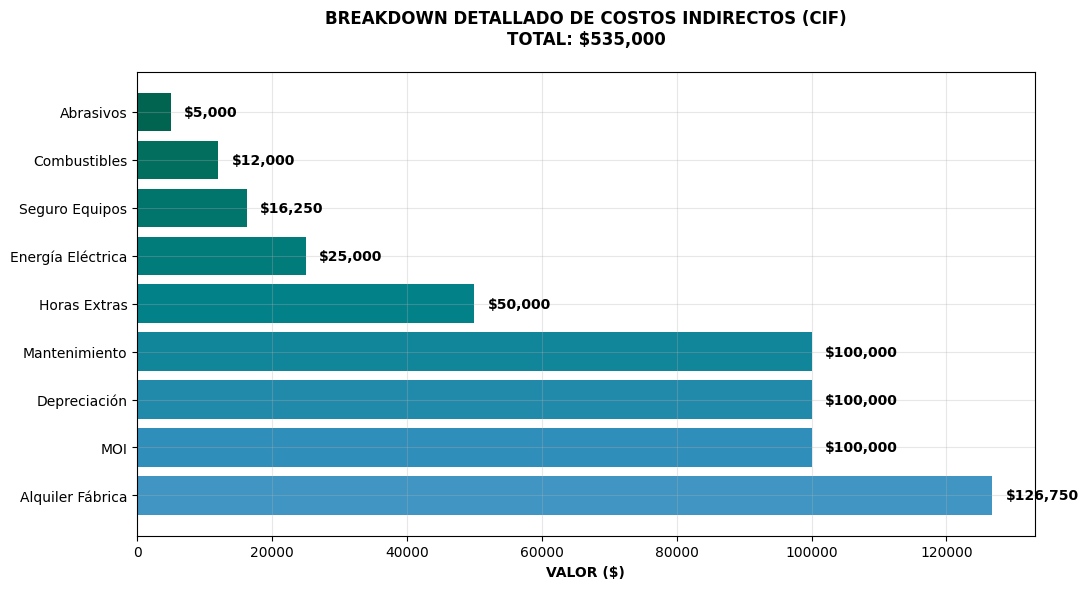

In [56]:
# Breakdown Detallado del CIF
fig, ax = plt.subplots(figsize=(11, 6))

# Componentes del CIF
cif_components = {
    'MOI': 100000,
    'Depreciación': 100000,
    'Mantenimiento': 100000,
    'Alquiler Fábrica': 126750,
    'Horas Extras': 50000,
    'Combustibles': 12000,
    'Energía Eléctrica': 25000,
    'Abrasivos': 5000,
    'Seguro Equipos': 16250
}

# Ordenar por valor
sorted_cif = dict(sorted(cif_components.items(), key=lambda x: x[1], reverse=True))

bars = ax.barh(list(sorted_cif.keys()), list(sorted_cif.values()), 
               color=cm.PuBuGn(np.linspace(0.6, 0.9, len(sorted_cif))))

# Añadir valores
for bar, valor in zip(bars, sorted_cif.values()):
    width = bar.get_width()
    ax.text(width + 2000, bar.get_y() + bar.get_height()/2, 
            f'${valor:,.0f}', ha='left', va='center', 
            fontweight='bold', fontsize=10)

ax.set_xlabel('VALOR ($)', fontweight='bold')
ax.set_title('BREAKDOWN DETALLADO DE COSTOS INDIRECTOS (CIF)\nTOTAL: $535,000', 
             fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


- Clase A (80/20): MOI + Depreciación + Mantenimiento + Alquiler = $426,750 (79.8%)

Costos de estructura de un 79.8%, necesarios para mantener la capacidad productiva.

- Clase B: Horas Extras + Energía = $75,000 (14.0%).
Clase C: Combustibles + Abrasivos + Seguro = $33,250 (6.2%).

Los costos variables se van a modificar según el nivel de actividad.



In [57]:
print("COSTO DE CONVERSIÓN")
display(df_costo_conversion)

COSTO DE CONVERSIÓN


,Concepto,Valor ($),Fórmula
0,Mano de Obra Directa (MOD),750000,Salarios directos
1,Costos Indirectos Fabricación (CIF),535000,Suma de todos los CIF
2,COSTO DE CONVERSIÓN,1285000,MOD + CIF


#### 3. Costo Total de Producción (CTP)

Incluye Costo Primo + CIF:

\begin{align*}
\text{Costo Total de Producción} &= \text{Costo Primo} + \text{CIF}\\
\end{align*}

In [58]:
# Función para calcular Costo de Producción
def calcular_costo_produccion():
    """Calcula el CTP (MPD + MOD + CIF)"""
    costo_produccion = mpd + mod + cif
    
    df_calculo = pd.DataFrame({
        'Concepto': [
            'Materia Prima Directa (MPD)',
            'Mano de Obra Directa (MOD)',
            'Costos Indirectos Fabricación (CIF)',
            'COSTO TOTAL DE PRODUCCIÓN'
        ],
        'Valor ($)': [mpd, mod, cif, costo_produccion],
        'Fórmula': [
            'Compras + Inv. Inicial - Inv. Final',
            'Salarios directos',
            'Suma de CIF',
            'MPD + MOD + CIF'
        ]
    })
    
    return costo_produccion, df_calculo

costo_produccion, df_costo_produccion = calcular_costo_produccion()
print("CÁLCULO DEL COSTO DE PRODUCCIÓN")
display(df_costo_produccion)

CÁLCULO DEL COSTO DE PRODUCCIÓN


,Concepto,Valor ($),Fórmula
0,Materia Prima Directa (MPD),829900,Compras + Inv. Inicial - Inv. Final
1,Mano de Obra Directa (MOD),750000,Salarios directos
2,Costos Indirectos Fabricación (CIF),535000,Suma de CIF
3,COSTO TOTAL DE PRODUCCIÓN,2114900,MPD + MOD + CIF


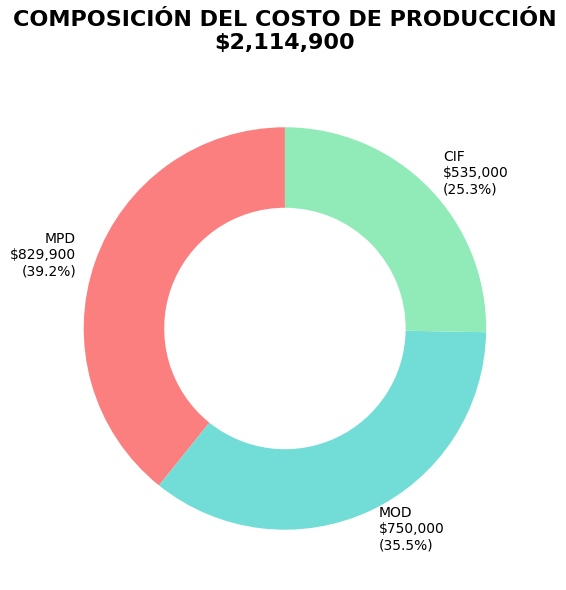

In [59]:
# Composición del Costo de Producción (Sunburst)
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

# Datos para el sunburst
components = ['MPD', 'MOD', 'CIF']
sizes = [829900, 750000, 535000]
colors = ["#FC7B7BF8", "#71DDD6", "#90EBB9"]
labels = [f'{comp}\n${size:,.0f}\n({size/2114900*100:.1f}%)' 
          for comp, size in zip(components, sizes)]

wedges, texts = ax.pie(sizes, labels=labels, colors=colors,
                       startangle=90, wedgeprops=dict(width=0.4))

plt.title('COMPOSICIÓN DEL COSTO DE PRODUCCIÓN\n$2,114,900', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

#### 4. Resultado del Período (RP)

Para obtenerlo:

- Costo Unitario Producción (CU):

\begin{align*}
\text{Costo Unitario} &= \text{Costo Total de Producción} / \text{Cantidad e Unidades Fabricadas}\\
\end{align*}


- Costo de Ventas (CV):

\begin{align*}
\text{Costo de Ventas} &= \text{Costo Unitario de Producción} x \text{Unidades vendidas}\\
\end{align*}

- Resultado Bruto:

\begin{align*}
\text{Resultado Bruto} &= \text{Ventas} - \text{Costo de Ventas}\\
\end{align*}

- Gastos de comercialización y administración (Opeerativos):

\begin{align*}
\text{Gastos Operativos} &= \text{Gastos Comercialización} + \text{Gastos Administrativos}\\
\end{align*}

\begin{align*}
\text{Gastos Operativos} &= (\text{Gastos envío sucursa} + \text{Comisiones de ventas} + \text{Sueldos personal Ventas}) + \text{Gastos Administrativos}\\
\end{align*}

**Resultado del Período**:

\begin{align*}
\text{Restultados del Período} &= \text{Resultado bruto} - \text{Gastos Operativos} \\
\end{align*}



In [60]:
# Función para calcular C Unitario y CMV
def calcular_costo_unitario_cmv():
    """Calcula CU y CM Vendida"""
    costo_unitario = costo_produccion / unidades["producidas"]
    cmv = unidades["vendidas"] * costo_unitario
    
    df_calculo = pd.DataFrame({
        'Concepto': [
            'Costo Total de Producción',
            'Unidades Producidas',
            'COSTO UNITARIO',
            'Unidades Vendidas',
            'COSTO MERCADERÍA VENDIDA (CMV)'
        ],
        'Valor': [
            f"${costo_produccion:,.2f}",
            f"{unidades['producidas']:,} unidades",
            f"${costo_unitario:,.2f}",
            f"{unidades['vendidas']:,} unidades",
            f"${cmv:,.2f}"
        ],
        'Fórmula': [
            'MPD + MOD + CIF',
            'Dato proporcionado',
            'Costo Producción / Unidades Producidas',
            'Dato proporcionado',
            'Unidades Vendidas × Costo Unitario'
        ]
    })
    
    return costo_unitario, cmv, df_calculo

costo_unitario, cmv, df_costo_unitario = calcular_costo_unitario_cmv()
print("CÁLCULO DE COSTO UNITARIO Y CMV")
display(df_costo_unitario)

CÁLCULO DE COSTO UNITARIO Y CMV


,Concepto,Valor,Fórmula
0,Costo Total de Producción,"$2,114,900.00",MPD + MOD + CIF
1,Unidades Producidas,"9,750 unidades",Dato proporcionado
2,COSTO UNITARIO,$216.91,Costo Producción / Unidades Producidas
3,Unidades Vendidas,"6,420 unidades",Dato proporcionado
4,COSTO MERCADERÍA VENDIDA (CMV),"$1,392,580.31",Unidades Vendidas × Costo Unitario


In [61]:
# Función para calcular Resultado del Período
def calcular_resultado_periodo():
    """Calcula el Resultado del Período"""
    gastos_comerciales = sum(datos[item] for item in clasificacion["Gastos Comerciales"])
    gastos_administrativos = sum(datos[item] for item in clasificacion["Gastos Administrativos"])
    total_gastos = gastos_comerciales + gastos_administrativos
    
    resultado_bruto = ventas - cmv
    resultado_operativo = resultado_bruto - total_gastos
    
    # DataFrame Estado de Resultados
    df_estado_resultados = pd.DataFrame({
        'Concepto': [
            'VENTAS',
            '(-) Costo Mercadería Vendida (CMV)',
            '(=) RESULTADO BRUTO',
            '(-) Gastos Comerciales',
            '(-) Gastos Administrativos',
            '(=) RESULTADO OPERATIVO DEL PERÍODO'
        ],
        'Valor ($)': [
            ventas,
            -cmv,
            resultado_bruto,
            -gastos_comerciales,
            -gastos_administrativos,
            resultado_operativo
        ],
        'Detalle': [
            'Ingresos por ventas',
            f'{unidades["vendidas"]:,} unidades × ${costo_unitario:,.2f}',
            'Ventas - CMV',
            'Gastos de comercialización',
            'Gastos administrativos',
            'Resultado Bruto - Total Gastos'
        ]
    })
    
    return resultado_operativo, df_estado_resultados

resultado_operativo, df_estado_resultados = calcular_resultado_periodo()
print("ESTADO DE RESULTADOS")
display(df_estado_resultados)

ESTADO DE RESULTADOS


,Concepto,Valor ($),Detalle
0,VENTAS,3.000000e+06,Ingresos por ventas
1,(-) Costo Mercadería Vendida (CMV),-1.392580e+06,"6,420 unidades × $216.91"
2,(=) RESULTADO BRUTO,1.607420e+06,Ventas - CMV
3,(-) Gastos Comerciales,-5.750000e+05,Gastos de comercialización
4,(-) Gastos Administrativos,-2.500000e+05,Gastos administrativos
5,(=) RESULTADO OPERATIVO DEL PERÍODO,7.824197e+05,Resultado Bruto - Total Gastos


In [62]:
# Función para resumen final
def crear_resumen_final():
    """Crea DataFrame con resumen final de todos los resultados"""
    df_resumen = pd.DataFrame({
        'INDICADOR': [
            'Materia Prima Directa (MPD)',
            'Mano de Obra Directa (MOD)',
            'Costos Indirectos Fabricación (CIF)',
            'COSTO PRIMO (MPD + MOD)',
            'COSTO DE CONVERSIÓN (MOD + CIF)',
            'COSTO DE PRODUCCIÓN (MPD + MOD + CIF)',
            'COSTO UNITARIO DE PRODUCCIÓN',
            'COSTO MERCADERÍA VENDIDA (CMV)',
            'RESULTADO OPERATIVO DEL PERÍODO'
        ],
        'VALOR ($)': [
            mpd, mod, cif, costo_primo, costo_conversion,
            costo_produccion, costo_unitario, cmv, resultado_operativo
        ],
        'FÓRMULA': [
            'Compras MP + Inv. Inicial - Inv. Final',
            'Salarios directos producción',
            'Suma de todos los CIF',
            'MPD + MOD',
            'MOD + CIF',
            'MPD + MOD + CIF',
            f'${costo_produccion:,.0f} / {unidades["producidas"]:,}',
            f'{unidades["vendidas"]:,} × ${costo_unitario:,.2f}',
            'Ventas - CMV - Gastos Comerciales - Gastos Administrativos'
        ]
    })
    
    return df_resumen

df_resumen_final = crear_resumen_final()
print("RESUMEN FINAL - TODOS LOS RESULTADOS")
display(df_resumen_final)

RESUMEN FINAL - TODOS LOS RESULTADOS


,INDICADOR,VALOR ($),FÓRMULA
0,Materia Prima Directa (MPD),8.299000e+05,Compras MP + Inv. Inicial - Inv. Final
1,Mano de Obra Directa (MOD),7.500000e+05,Salarios directos producción
2,Costos Indirectos Fabricación (CIF),5.350000e+05,Suma de todos los CIF
3,COSTO PRIMO (MPD + MOD),1.579900e+06,MPD + MOD
4,COSTO DE CONVERSIÓN (MOD + CIF),1.285000e+06,MOD + CIF
5,COSTO DE PRODUCCIÓN (MPD + MOD + CIF),2.114900e+06,MPD + MOD + CIF
6,COSTO UNITARIO DE PRODUCCIÓN,2.169128e+02,"$2,114,900 / 9,750"
7,COSTO MERCADERÍA VENDIDA (CMV),1.392580e+06,"6,420 × $216.91"
8,RESULTADO OPERATIVO DEL PERÍODO,7.824197e+05,Ventas - CMV - Gastos Comerciales - Gastos Adm...


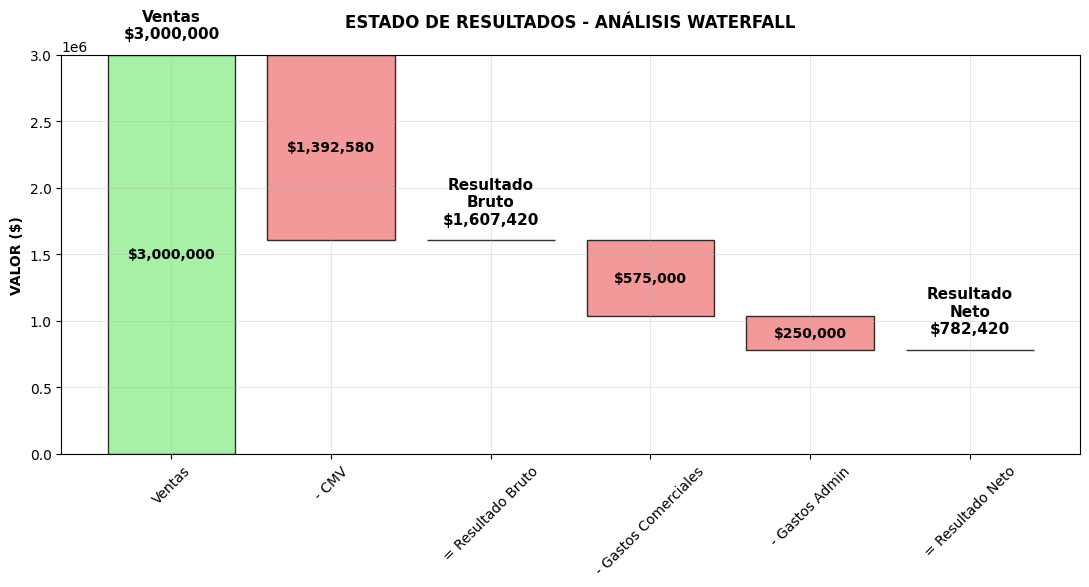

In [63]:
# Waterfall Chart del Estado de Resultados
fig, ax = plt.subplots(figsize=(11, 6))

# Datos para waterfall
steps = ['Ventas', '- CMV', '= Resultado Bruto', '- Gastos Comerciales', 
         '- Gastos Admin', '= Resultado Neto']
values = [3000000, -1392580, 0, -575000, -250000, 0]
cumulative = [0, 3000000, 1607420, 1607420, 1032420, 782420]

colors = ['lightgreen', 'lightcoral', 'navy', 'lightcoral', 'lightcoral', 'navy']

bars = ax.bar(steps, values, bottom=cumulative[:len(steps)], 
              color=colors, edgecolor='black', alpha=0.8)

# Añadir valores
for i, (bar, val) in enumerate(zip(bars, values)):
    if val != 0:
        height = bar.get_height()
        y_pos = cumulative[i] + height/2
        ax.text(bar.get_x() + bar.get_width()/2, y_pos, 
                f'${abs(val):,.0f}', ha='center', va='center', 
                fontweight='bold', fontsize=10)

# Etiquetas finales
final_values = [3000000, 1607420, 782420]
final_labels = ['Ventas', 'Resultado\nBruto', 'Resultado\nNeto']
for i, (x, y, label) in enumerate(zip([0, 2, 5], final_values, final_labels)):
    ax.text(x, y + 100000, f'{label}\n${y:,.0f}', 
             ha='center', va='bottom', fontweight='bold', fontsize=11)

ax.set_ylabel('VALOR ($)', fontweight='bold')
ax.set_title('ESTADO DE RESULTADOS - ANÁLISIS WATERFALL', fontweight='bold', pad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Alto margen que indica buena política de precios y control de costos de producción. Los gatos operativos incluyen gastos de comercialización y administrativos, necesarios pero no productivos.
La rentabilidad operativa es saludable para el sector.

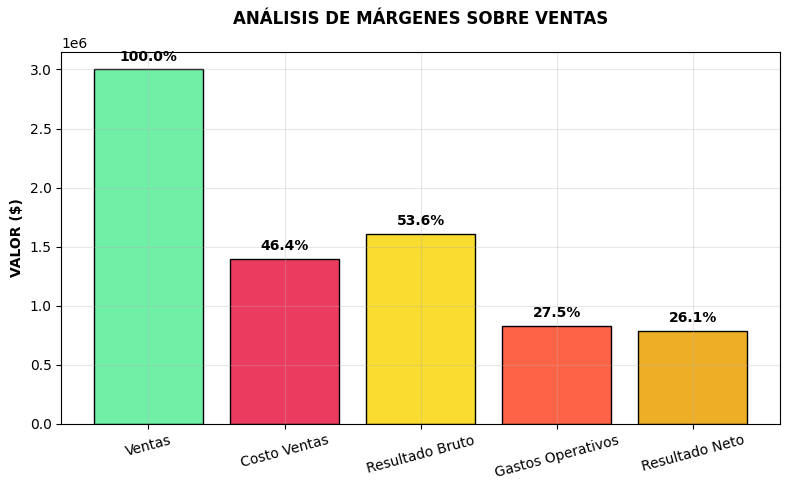

In [64]:
# Análisis de Margenes
fig, ax = plt.subplots(figsize=(8, 5))

conceptos = ['Ventas', 'Costo Ventas', 'Resultado Bruto', 'Gastos Operativos', 'Resultado Neto']
valores = [3000000, 1392580, 1607420, 825000, 782420]
colores = ["#70F0A7", "#EB3C5F", "#FADB2F", '#FF6347', "#EEAF27"]

bars = ax.bar(conceptos, valores, color=colores, edgecolor='black')

# Añadir porcentajes
for i, (bar, valor) in enumerate(zip(bars, valores)):
    height = bar.get_height()
    porcentaje = (valor / 3000000) * 100
    ax.text(bar.get_x() + bar.get_width()/2, height + 50000, 
            f'{porcentaje:.1f}%', ha='center', va='bottom', 
            fontweight='bold', fontsize=10)

ax.set_ylabel('VALOR ($)', fontweight='bold')
ax.set_title('ANÁLISIS DE MÁRGENES SOBRE VENTAS', fontweight='bold', pad=20)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### Exportación de resultados

In [65]:
# Exportación a Excel
def exportar_a_excel():
    """Exporta todos los DataFrames a Excel"""
    with pd.ExcelWriter('resultados_actividad_5_completo.xlsx') as writer:
        df_clasificacion.to_excel(writer, sheet_name='Clasificación_Costos', index=False)
        df_costo_primo.to_excel(writer, sheet_name='Costo_Primo', index=False)
        df_cif_detalle.to_excel(writer, sheet_name='Detalle_CIF', index=False)
        df_costo_conversion.to_excel(writer, sheet_name='Costo_Conversión', index=False)
        df_costo_produccion.to_excel(writer, sheet_name='Costo_Producción', index=False)
        df_costo_unitario.to_excel(writer, sheet_name='Costo_Unitario_CMV', index=False)
        df_estado_resultados.to_excel(writer, sheet_name='Estado_Resultados', index=False)
        df_resumen_final.to_excel(writer, sheet_name='Resumen_Final', index=False)
    
    print("Todos los resultados exportados a 'resultados_actividad_5_completo.xlsx'")

exportar_a_excel()

Todos los resultados exportados a 'resultados_actividad_5_completo.xlsx'
